In [1]:
# 导入需要的各种库

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 基于森林中树的特征重要度

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


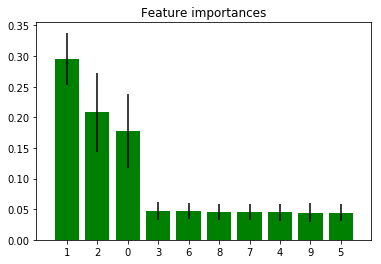

In [2]:
print(__doc__)

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

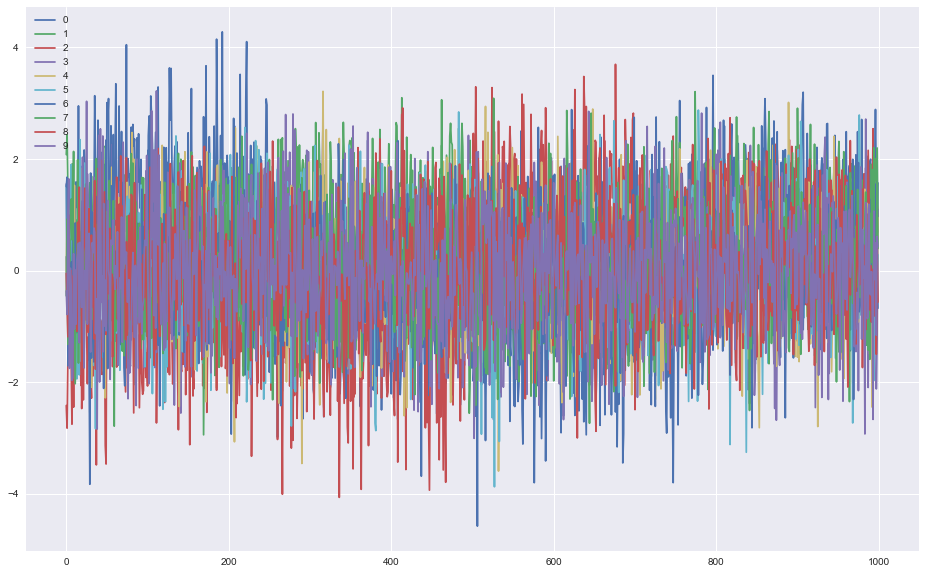

In [3]:
sns.set()
pd.DataFrame(X).plot(figsize=(16, 10))

# 特征选择

In [4]:
from sklearn.datasets import load_boston, load_iris

In [5]:
boston = load_boston()
iris = load_iris()

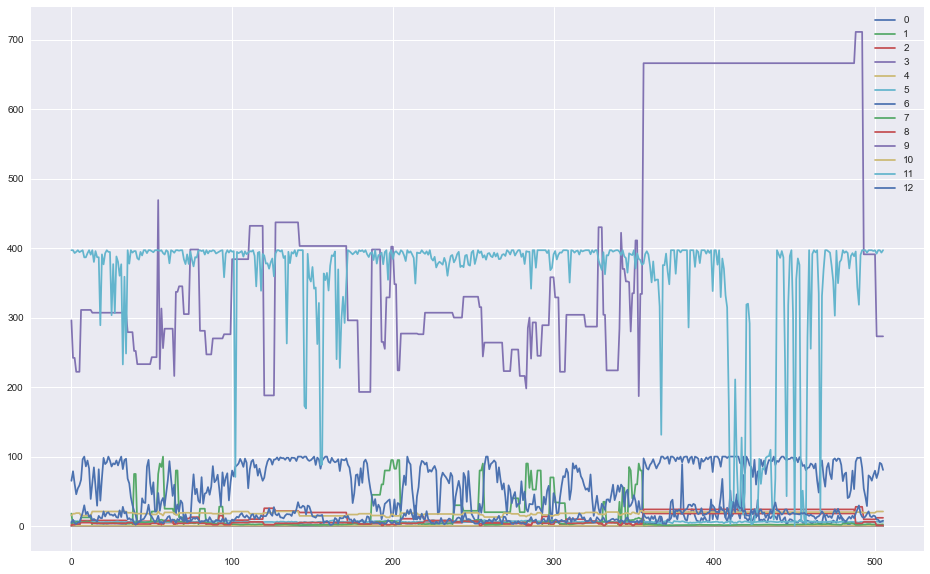

In [6]:
sns.set()
pd.DataFrame(boston.data).plot(figsize=(16, 10))

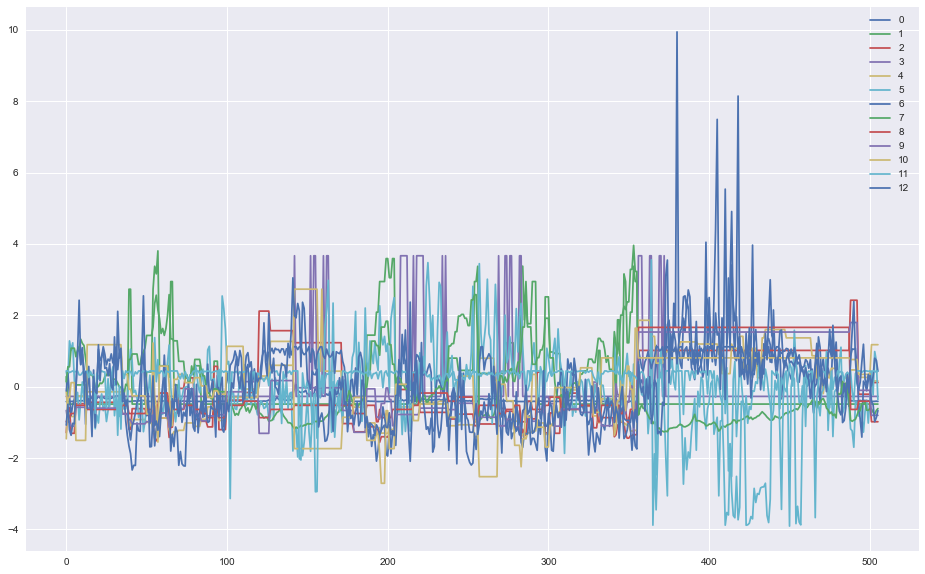

In [7]:
from sklearn.preprocessing import StandardScaler

boston_sc = StandardScaler().fit_transform(boston.data)
bst_sc = StandardScaler().fit_transform(boston.target.reshape(-1,1))

sns.set()
pd.DataFrame(boston_sc).plot(figsize=(16, 10))

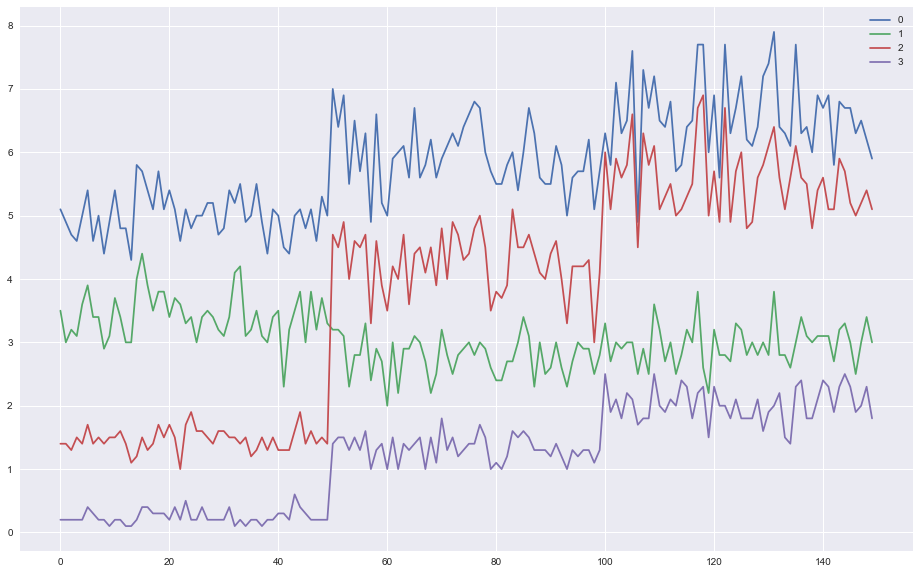

In [8]:
sns.set()
pd.DataFrame(iris.data).plot(figsize=(16, 10))

## Filter

按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。

### 去掉取值变化小的特征 方差选择法

这应该是最简单的特征选择方法了：假设某特征的特征值只有0和1，并且在所有输入样本中，95%的实例的该特征取值都是1，那就可以认为这个特征作用不大。如果100%都是1，那这个特征就没意义了。当特征值都是离散型变量的时候这种方法才能用，如果是连续型变量，就需要将连续变量离散化之后才能用，而且实际当中，一般不太会有95%以上都取某个值的特征存在，所以这种方法虽然简单但是不太好用。可以把它作为特征选择的预处理，先去掉那些取值变化小的特征，然后再从接下来提到的的特征选择方法中选择合适的进行进一步的特征选择。

使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。使用feature_selection库的VarianceThreshold类来选择特征的代码如下：

In [9]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X = np.array(X)
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [10]:
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

第一列的特征被去掉

### 单变量特征选择 相关系数法

单变量特征选择能够对每一个特征进行测试，衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。对于回归和分类问题可以采用卡方检验等方式对特征进行测试。

这种方法比较简单，易于运行，易于理解，通常对于理解数据有较好的效果（但对特征优化、提高泛化能力来说不一定有效）；这种方法有许多改进的版本、变种。

#### 卡方检验

经典的卡方检验是检验定性自变量对定性因变量的相关性。

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(boston.target)

# 选择K个最好的特征，返回选择特征后的数据
boston_model = SelectKBest(chi2, k=6)
boston_chi2 = boston_model.fit_transform(boston.data, encoded)
iris_model = SelectKBest(chi2, k=2)
iris_chi2 = iris_model.fit_transform(iris.data, iris.target)

In [12]:
pd.DataFrame(boston_chi2)

,0,1,2,3,4,5
0,0.00632,18.0,65.2,1.0,296.0,396.90
1,0.02731,0.0,78.9,2.0,242.0,396.90
2,0.02729,0.0,61.1,2.0,242.0,392.83
3,0.03237,0.0,45.8,3.0,222.0,394.63
4,0.06905,0.0,54.2,3.0,222.0,396.90
5,0.02985,0.0,58.7,3.0,222.0,394.12
6,0.08829,12.5,66.6,5.0,311.0,395.60
7,0.14455,12.5,96.1,5.0,311.0,396.90
8,0.21124,12.5,100.0,5.0,311.0,386.63
9,0.17004,12.5,85.9,5.0,311.0,386.71


In [13]:
pd.DataFrame(iris_chi2)

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [14]:
boston_model.scores_

array([  7.66445017e+03,   1.40915831e+04,   1.36388690e+03,
         2.24058231e+02,   8.04562622e+00,   2.72824522e+01,
         3.83503367e+03,   3.26641023e+02,   2.45292122e+03,
         2.26734027e+04,   7.61592918e+01,   7.07421686e+03,
         1.68035781e+03])

In [15]:
iris_model.scores_

array([  10.81782088,    3.59449902,  116.16984746,   67.24482759])

#### Pearson相关系数 Pearson Correlation

皮尔森相关系数是一种最简单的，能帮助理解特征和响应变量之间关系的方法，该方法衡量的是变量之间的线性相关性，结果的取值区间为[-1，1]，-1表示完全的负相关(这个变量下降，那个就会上升)，+1表示完全的正相关，0表示没有线性相关。

Pearson Correlation速度快、易于计算，经常在拿到数据(经过清洗和特征提取之后的)之后第一时间就执行。Scipy的pearsonr方法能够同时计算相关系数和p-value

## Wrapper

### 递归特征消除法

递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。使用feature_selection库的RFE类来选择特征的代码如下：

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 递归特征消除法，返回特征选择后的数据
# 参数estimator为基模型
# 参数n_features_to_select为选择的特征个数

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(bst_sc)

boston_rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6).fit_transform(boston_sc, encoded)
iris_rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(iris.data, iris.target)

/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
pd.DataFrame(boston_rfe)

,0,1,2,3,4,5
0,-1.287909,-0.144217,-0.120013,0.140214,-0.666608,-1.075562
1,-0.593381,-0.740262,0.367166,0.557160,-0.987329,-0.492439
2,-0.593381,-0.740262,-0.265812,0.557160,-0.987329,-1.208727
3,-1.306878,-0.835284,-0.809889,1.077737,-1.106115,-1.361517
4,-1.306878,-0.835284,-0.511180,1.077737,-1.106115,-1.026501
5,-1.306878,-0.835284,-0.351157,1.077737,-1.106115,-1.043322
6,-0.476654,-0.265154,-0.070229,0.839244,-0.577519,-0.031268
7,-0.476654,-0.265154,0.978808,1.024638,-0.577519,0.910700
8,-0.476654,-0.265154,1.117494,1.087196,-0.577519,2.421774
9,-0.476654,-0.265154,0.616090,1.329635,-0.577519,0.623344


In [18]:
pd.DataFrame(iris_rfe)

,0,1
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
5,3.9,0.4
6,3.4,0.3
7,3.4,0.2
8,2.9,0.2
9,3.1,0.1


## Embedded

### 基于树模型的特征选择法

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
# GBDT作为基模型的特征选择
iris_model = SelectFromModel(GradientBoostingClassifier())
iris_gbdt = iris_model.fit_transform(iris.data, iris.target)

In [21]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(boston.target)

boston_model = SelectFromModel(GradientBoostingClassifier())
boston_gbdt = boston_model.fit_transform(boston.data, encoded)

In [22]:
pd.DataFrame(boston_gbdt)

,0,1,2,3,4,5
0,0.00632,6.575,65.2,4.0900,396.90,4.98
1,0.02731,6.421,78.9,4.9671,396.90,9.14
2,0.02729,7.185,61.1,4.9671,392.83,4.03
3,0.03237,6.998,45.8,6.0622,394.63,2.94
4,0.06905,7.147,54.2,6.0622,396.90,5.33
5,0.02985,6.430,58.7,6.0622,394.12,5.21
6,0.08829,6.012,66.6,5.5605,395.60,12.43
7,0.14455,6.172,96.1,5.9505,396.90,19.15
8,0.21124,5.631,100.0,6.0821,386.63,29.93
9,0.17004,6.004,85.9,6.5921,386.71,17.10


In [23]:
pd.DataFrame(iris_gbdt)

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


## 交叉验证

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=14)

scores_chi2 = cross_val_score(clf, iris_chi2, iris.target, scoring='accuracy')
scores_rfe = cross_val_score(clf, iris_rfe, iris.target, scoring='accuracy')
scores_gbdt = cross_val_score(clf, iris_gbdt, iris.target, scoring='accuracy')

In [25]:
scores_chi2.mean()

0.96037581699346397

In [26]:
scores_rfe.mean()

0.94076797385620914

In [27]:
scores_gbdt.mean()

0.96037581699346397

In [28]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(boston.target)

scores_chi2 = cross_val_score(clf, boston_chi2, encoded, scoring='accuracy')
scores_rfe = cross_val_score(clf, boston_rfe, encoded, scoring='accuracy')
scores_gbdt = cross_val_score(clf, boston_gbdt, encoded, scoring='accuracy')

/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [29]:
scores_chi2.mean()

0.023104798820988027

In [30]:
scores_rfe.mean()

0.03534653665233279

In [31]:
scores_gbdt.mean()

0.02193870752831446

# 降维

当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有主成分分析法（PCA）和线性判别分析（LDA），线性判别分析本身也是一个分类模型。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。

## 主成分分析法（PCA）

In [32]:
from sklearn.decomposition import PCA

#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
iris_pca = PCA(n_components=2).fit_transform(iris.data)
boston_pca = PCA(n_components=2).fit_transform(boston.data)

In [33]:
pd.DataFrame(iris_pca)

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
5,-2.279897,0.747783
6,-2.820891,-0.082105
7,-2.626482,0.170405
8,-2.887959,-0.570798
9,-2.673845,-0.106692


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=14)

scores_pca = cross_val_score(clf, iris_pca, iris.target, scoring='accuracy')

In [35]:
scores_pca.mean()

0.91421568627450978

## sklearn特征选择-随机森林方法

class labels: [0 1 2]
 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


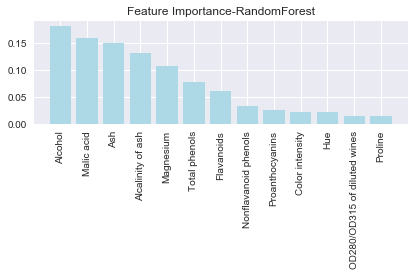

' \n1) Alcohol                        0.182483 \n 2) Malic acid                     0.158610 \n 3) Ash                            0.150948 \n 4) Alcalinity of ash              0.131987 \n 5) Magnesium                      0.106589 \n 6) Total phenols                  0.078243 \n 7) Flavanoids                     0.060718 \n 8) Nonflavanoid phenols           0.032033 \n 9) Proanthocyanins                0.025400 \n10) Color intensity                0.022351 \n11) Hue                            0.022078 \n12) OD280/OD315 of diluted wines   0.014645 \n13) Proline                        0.013916 \n'

In [36]:
# -*- coding: utf-8 -*-  
''' 
Created on 2018年1月17日 
@author: Jason.F 
@summary: Scikit-Learn库随机森林-特征选择 
'''  
import pandas as pd  
import numpy as np  
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier  
#导入数据  
wine = load_wine()
df_wine = pd.concat([pd.DataFrame(wine.target), pd.DataFrame(wine.data)], axis=1)
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']  
print ('class labels:',np.unique(df_wine['Class label']))  
#分割训练集合测试集  
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)  
#特征值缩放-标准化，决策树模型不依赖特征缩放  
#stdsc=StandardScaler()  
#X_train_std=stdsc.fit_transform(X_train)  
#X_test_std=stdsc.fit_transform(X_test)  
#随机森林评估特征重要性  
feat_labels=df_wine.columns[1:]  
forest=RandomForestClassifier(n_estimators=10000,n_jobs=-1,random_state=0)  
forest.fit(X_train,y_train)  
importances=forest.feature_importances_  
indices=np.argsort(importances)[::-1]  
for f in range(X_train.shape[1]):  
    #给予10000颗决策树平均不纯度衰减的计算来评估特征重要性  
    print ("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]) )  
#可视化特征重要性-依据平均不纯度衰减  
plt.title('Feature Importance-RandomForest')  
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')  
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)  
plt.xlim([-1,X_train.shape[1]])  
plt.tight_layout()  
plt.show()  

''' 
1) Alcohol                        0.182483 
 2) Malic acid                     0.158610 
 3) Ash                            0.150948 
 4) Alcalinity of ash              0.131987 
 5) Magnesium                      0.106589 
 6) Total phenols                  0.078243 
 7) Flavanoids                     0.060718 
 8) Nonflavanoid phenols           0.032033 
 9) Proanthocyanins                0.025400 
10) Color intensity                0.022351 
11) Hue                            0.022078 
12) OD280/OD315 of diluted wines   0.014645 
13) Proline                        0.013916 
'''